### 1. 初始化超平面
$${w * x + b} = 0$$
### 2. 判断误分类样本
使用函数间隔（functional margin）：$$y_{i}(w\cdot x_{i}+b)<0$$
### 3. 感知机的损失函数和梯度
M表示的是所有误分类点的集合
损失函数: $$L(w, b) = - \frac{1}{\left \| w \right \|} \sum_{x_{i}\subset M{i}} y_{i}(w \cdot x_{i} + b)$$
梯度:
$$\nabla_{w}L(w,b)=-\sum_{xi\in M}^{}yixi$$
$$\nabla_{b}L(w,b)=-\sum_{xi\in M}^{}yi$$
更新:  ($\lambda$ = 步长，学习率)
$$w = w + \lambda \sum_{x_{i}\subset M{i}}y_{i}x_{i}$$
$$b = b + \lambda \sum_{x_{i}\subset M{i}}y_{i}$$
对偶：N:样本数
$$w = \lambda \sum_{i=1}^{N}a_{i}y_{i}x_{i}$$
$$b = \lambda \sum_{i=1}^{N}a_{i}y_{i}$$

In [32]:
#将数据转换成矩阵格式
#Batch

x_mat = np.mat(X)

#1. 初始化超平面（w，b）
w = np.mat(np.ones(X.shape[1])).T
b = 0
count=0
while True:
    count += 1
    
#     plt.scatter(X[:,0], X[:,1], cmap = 'cool', c = Y)
#     plt.plot(X[:,0],np.array(-w[0]/w[1] * X[:,0] - b/w[1]).ravel(),label=count)
#     plt.legend(loc=4)
    
    #2. 找出所有的误分类样本
    tmp = (np.array((x_mat * w + b)).ravel() * Y)
    
    if (tmp<0).sum()==0:#没有误分类样本
        break
        
    misclassified_X,misclassified_Y = X[tmp<0],Y[tmp<0] ##误分类
    print('loop{}-Missing:{}'.format(count,misclassified_X.shape[0]))
    
    #3. 计算梯度
    lam = 1  #lambda学习率
    gd_w = np.mat((misclassified_Y * misclassified_X.T).sum(axis=1)).T  #w的梯度
    gd_b = misclassified_Y.sum()  #b的梯度

    #4. 更新w，b
    w += lam*gd_w
    b += lam*gd_b
w,b

    


loop1-Missing:99
loop2-Missing:100
loop3-Missing:99
loop4-Missing:92
loop5-Missing:8
loop6-Missing:8
loop7-Missing:8
loop8-Missing:3
loop9-Missing:4
loop10-Missing:5
loop11-Missing:5
loop12-Missing:4
loop13-Missing:3
loop14-Missing:3
loop15-Missing:2
loop16-Missing:3
loop17-Missing:3
loop18-Missing:1
loop19-Missing:3
loop20-Missing:1
loop21-Missing:3
loop22-Missing:1
loop23-Missing:3
loop24-Missing:1
loop25-Missing:3
loop26-Missing:1
loop27-Missing:3
loop28-Missing:2
loop29-Missing:2
loop30-Missing:2
loop31-Missing:2
loop32-Missing:2
loop33-Missing:2
loop34-Missing:2
loop35-Missing:2
loop36-Missing:2
loop37-Missing:2
loop38-Missing:2
loop39-Missing:2
loop40-Missing:2
loop41-Missing:2
loop42-Missing:2
loop43-Missing:2
loop44-Missing:2
loop45-Missing:2
loop46-Missing:2
loop47-Missing:2
loop48-Missing:2
loop49-Missing:2
loop50-Missing:1
loop51-Missing:1
loop52-Missing:1
loop53-Missing:1
loop54-Missing:1
loop55-Missing:1
loop56-Missing:1
loop57-Missing:1
loop58-Missing:1
loop59-Missing:1
l

(matrix([[38.44808576],
         [62.18842263]]),
 -203)

$$w = \lambda \sum_{i=1}^{N}a_{i}y_{i}x_{i}$$
$$b = \lambda \sum_{i=1}^{N}a_{i}y_{i}$$
LossFunction：（$x_{j},y_{j}$是随机抽取的一个测试样本）
$$y_{j}(\lambda \sum_{i=1}^{N}a_{i}y_{i}x_{i} \cdot x_{j}+\lambda \sum_{i=1}^{N}a_{i}y_{i})<=0$$

(2, 1)

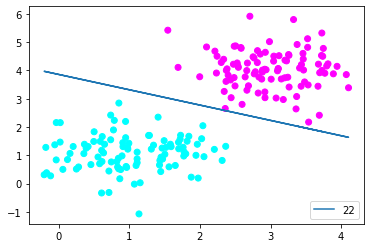

In [7]:
#将y=0替换成y=-1
Y[Y == 0] = -1 

#stochastic single sample
#1. 初始化 a, lambda步长
x_mat = np.mat(X)
a = np.zeros(X.shape[0])
lam = 0.1
count=0
#2. gram matrix
gram = np.array(x_mat * x_mat.T)

while True:
    count += 1
    miss_idx = -1  #误分类样本的index
    
    #3. 生成随机索引来实现随机抽取
    random_choice = np.random.choice(a=range(0,X.shape[0]),size=(1,X.shape[0]),replace=False).ravel()
    for j in random_choice:
        wx = lam * (a * Y * gram[j,:]).sum()
        b = lam * (a * Y).sum()
        check = Y[j] * (wx + b) #函数间隔
        if check <=0:
            miss_idx = j
            break
            
    #4. 更新a
    if miss_idx == -1:
        break
    a[miss_idx]+=1
w = (lam * (np.mat(a * Y) * X)).T
b = lam * (a * Y).sum()
plt.scatter(X[:,0], X[:,1], cmap = ['cool'], c = Y)
plt.plot(X[:,0],np.array(-w[0]/w[1] * X[:,0] - b/w[1]).ravel(),label=count)
plt.legend(loc=4)
w.shape

In [94]:
class Ken_Perceptron():
    '''
    Perform Perceptron algorithm over X, Y.
    
    Label Y is expected to be 1D array, {-1,1}.
    
    Parameters:
    ----------
    learning_rate : float, default=0.1
        This is the 'lambda' used when updating w and b.
                
            - From formular: w += lam * gd_w
                
    method : {'batch', 'stochastic'}, default='stochastic' 
        The strategy used to calculate gradient descend.
        
        - If 'batch', all misclassified samples are used to calculate gradient descend.
        - If 'stochastic', only one randomly selected misclassified sample is used to calculate gradient descend.
                
    max_iteration : int, default=1000
        Maximum iterations before terminating the algorithm.
        
    Attributes
    ----------
    w_ : numpy.matrix of shape (n_sample,1)
        The 'w' parameter from below hyperplane formular:
            
            hyperplane formular: X * w + b = 0
    
    b_ : float
        The 'b' parameter from below hyperplane formular:
            
            hyperplane formular: X * w + b = 0
    
    iter_count_ : int
        Number of iterations performed when generating the hyperplane.
    
    a_ : numpy.ndarray of shape (n_sample,)
        This is the duality parameter
        
        Note: Only available when 'stochastic' strategy is used.
    
    Methods
    ----------
    plot(X,Y) : 
        This method visualizes the final hyperplane that is found
        
        Note: Only available when X has exactly 2 features
    
    demo(X,Y,time) : 
        This method demonstrates the evolution of the hyperplane over iterations
        
        Note: Only available when X has exactly 2 features
    '''
    
    def __init__(self,learning_rate=0.1,method='stochastic',max_iteration=1000):
        self.learning_rate = learning_rate
        self.method = method
        self.max_iteration = max_iteration
        
    def fit(self,X,Y):
        self.X = X
        self.Y = Y
        self.fit = False
        if set(Y)!={-1,1}:
            return print('Y is not {-1,1}')
        if Y.ndim!=1:
            return print('Y expected to be 1D array')
        if X.shape[0]!=Y.shape[0]:
            return print('X and Y are of different length')
        
        self.fit = True
        if self.method=='batch':
            self.w_list_ , self.b_list_ , self.iter_count_ = self.batch(X,Y)
            self.w_ = self.w_list_[-1]
            self.b_ = self.b_list_[-1]
        if self.method=='stochastic':
            self.a_ , self.w_list_ , self.b_list_ , self.iter_count_ = self.stochastic(X,Y)
            self.w_ = self.w_list_[-1]
            self.b_ = self.b_list_[-1]        
        if self.iter_count_==self.max_iteration:
            print('Warning: maximum iteration reached! Dataset probably not linearly separable')
        
        return self
        
    def plot(self,cmap='rainbow'):
        %matplotlib inline
        if self.fit==False:
            return print('Preceptron not fitted!')
        
        if self.X.shape[1]!=2:
            return print('plot() only accepts X that has two features')
        
        plt.scatter(self.X[:,0], self.X[:,1], cmap = cmap, c = self.Y)
        plt.plot(self.X[:,0],
                 np.array(-self.w_[0]/self.w_[1] * self.X[:,0] - self.b_/self.w_[1]).ravel(),
                 label='iter:{}'.format(self.iter_count_),c='black')
        plt.legend(loc=4)
    
    def demo(self,time=0.5):    
        if self.fit==False:
            return print('Preceptron not fitted!')
        
        if self.X.shape[1]!=2:
            return print('demo() only accepts X that has two features')
              
        %matplotlib auto
        count=0
        for w,b in zip(self.w_list_,self.b_list_):
            count+=1
            plt.cla()
            plt.scatter(X[:,0], X[:,1], cmap = 'cool', c = Y)
            plt.xlim((X[:,0].min()-1,X[:,0].max()+1))
            plt.ylim((X[:,1].min()-1,X[:,1].max()+1))
            plt.plot(X[:,0],np.array(-w[0]/w[1] * X[:,0] - b/w[1]).ravel(),label=count)
            plt.legend(loc=4)
            plt.pause(time)

    
    def batch(self,X,Y):
        x_mat = np.mat(X)
        w = np.mat(np.ones(X.shape[1])).T
        b = 0
        w_list = [w]
        b_list = [b]
        lam = self.learning_rate
        for iter_count in range(self.max_iteration):
            functional_margin = (np.array((x_mat * w + b)).ravel() * Y)

            if (functional_margin<0).sum()==0:
                break

            misclassified_X,misclassified_Y = X[functional_margin<0],Y[functional_margin<0]

            gd_w = np.mat((misclassified_Y * misclassified_X.T).sum(axis=1)).T
            gd_b = misclassified_Y.sum()

            w += lam*gd_w
            b += lam*gd_b
            w_list.append(w)
            b_list.append(b)
        return w_list,b_list,iter_count+1        
                
    def stochastic(self,X,Y):
        x_mat = np.mat(X)
        a = np.zeros(X.shape[0])
        lam = self.learning_rate
        gram = np.array(x_mat * x_mat.T)
        w = np.mat(np.ones(X.shape[1])).T
        w_list = [w]
        b_list = [0]

        for iter_count in range(self.max_iteration):
            miss_idx = -1  

            random_choice = np.random.choice(a=range(0,X.shape[0]),size=(1,X.shape[0]),replace=False).ravel()
            for j in random_choice:
                wx = lam * (a * Y * gram[j,:]).sum()
                b = lam * (a * Y).sum()
                check = Y[j] * (wx + b) 
                if check <=0:
                    miss_idx = j
                    break

            if miss_idx == -1:
                break
            a[miss_idx]+=1
            w = (lam * (np.mat(a * Y) * X)).T
            b = lam * (a * Y).sum()
            w_list.append(w)
            b_list.append(b)
            
        return a,w_list,b_list,iter_count+1

    

### 2D Dataset

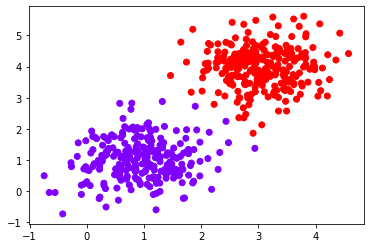

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.datasets import make_blobs

sample_size = 500
centers = [[1,1], [3,4]]
X, Y = make_blobs(n_samples = sample_size, centers = centers, 
                  cluster_std = 0.6)

#将y=0替换成y=-1
Y[Y == 0] = -1  
plt.scatter(X[:,0], X[:,1], cmap = 'rainbow', c = Y)

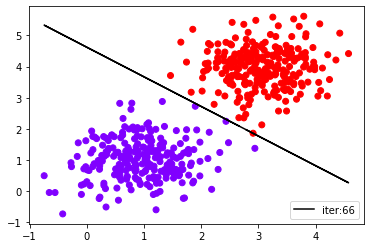

In [84]:
p = Ken_Perceptron(method='batch')
p1 = Ken_Perceptron(method='stochastic')
p.fit(X,Y)
p1.fit(X,Y) 
#p.w_  #查看w
#p.b_   #查看b 
#p.w_list_ #查看每个循环的w
#p.b_list_  #查看每个循环的b
p.plot()

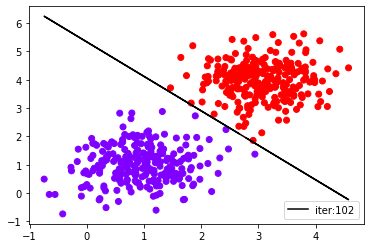

In [85]:
p1.plot()

Using matplotlib backend: Qt5Agg


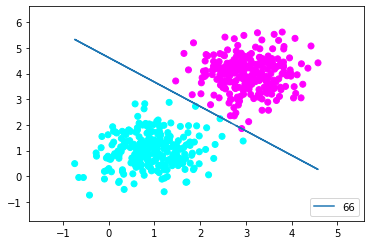

In [90]:
p.demo(time=0.2)

Using matplotlib backend: Qt5Agg


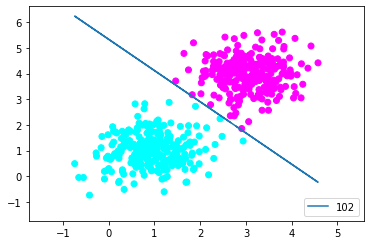

In [89]:
p1.demo(time=0.1)

### 3D Dataset

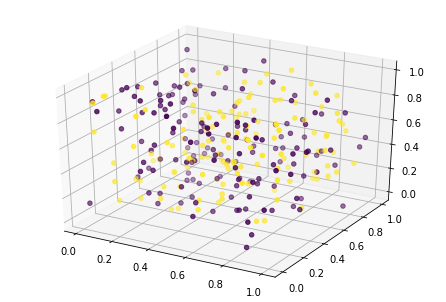

In [47]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

X = np.random.rand(300,3)
Y = np.random.randint(2,size = 300)
Y[Y==0]=-1
fig = plt.figure()
axes3d = Axes3D(fig)
axes3d.scatter(X[:,0],X[:,1],X[:,2],c=Y)


In [50]:
p = Ken_Perceptron(method='batch')
p.fit(X,Y)
p.plot()
p.demo()

plot() only accepts X that has two features
demo() only accepts X that has two features


In [49]:
p.w_list_

[matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.50624777],
         [-4.6417321 ]]),
 matrix([[-1.03230624],
         [-4.5

In [51]:
p.b_list_

[0,
 -16.1,
 -2.200000000000001,
 11.7,
 -4.400000000000002,
 9.499999999999998,
 -6.600000000000003,
 7.299999999999997,
 -8.800000000000004,
 5.099999999999996,
 -11.000000000000005,
 2.899999999999995,
 -13.200000000000006,
 0.699999999999994,
 -15.400000000000007,
 -1.500000000000007,
 -16.70000000000001,
 -2.8000000000000096,
 -8.40000000000001,
 5.499999999999991,
 -10.60000000000001,
 3.29999999999999,
 -12.800000000000011,
 1.099999999999989,
 -15.000000000000012,
 -1.100000000000012,
 -17.000000000000014,
 -3.100000000000014,
 -9.700000000000014,
 4.199999999999987,
 -11.900000000000015,
 1.9999999999999858,
 -14.100000000000016,
 -0.20000000000001528,
 -16.30000000000002,
 -2.400000000000018,
 -16.40000000000002,
 -2.5000000000000195,
 -15.600000000000021,
 -1.7000000000000206,
 -16.800000000000022,
 -2.9000000000000217,
 -9.600000000000023,
 4.299999999999978,
 -11.800000000000024,
 2.0999999999999766,
 -14.000000000000025,
 -0.10000000000002451,
 -16.200000000000024,
 -2.30

In [95]:
?Ken_Perceptron

Init signature: Ken_Perceptron(learning_rate=0.1, method='stochastic', max_iteration=1000)
Docstring:     
Perform Perceptron algorithm over X, Y.

Label Y is expected to be 1D array, {-1,1}.

Parameters:
----------
learning_rate : float, default=0.1
    This is the 'lambda' used when updating w and b.
            
        - From formular: w += lam * gd_w
            
method : {'batch', 'stochastic'}, default='stochastic' 
    The strategy used to calculate gradient descend.
    
    - If 'batch', all misclassified samples are used to calculate gradient descend.
    - If 'stochastic', only one randomly selected misclassified sample is used to calculate gradient descend.
            
max_iteration : int, default=1000
    Maximum iterations before terminating the algorithm.
    
Attributes
----------
w_ : numpy.matrix of shape (n_sample,1)
    The 'w' parameter from below hyperplane formular:
        
        hyperplane formular: X * w + b = 0

b_ : float
    The 'b' parameter from below